In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from typing import TypedDict
from dotenv import load_dotenv
import os

d:\New folder (2)\Agentic\agenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
load_dotenv()

# Step 1: Create HuggingFaceEndpoint instance
llm = HuggingFaceEndpoint(
    repo_id="openai/gpt-oss-120b",  # ✅ Chat-compatible model
    task="text-generation",
    huggingfacehub_api_token=os.getenv("HUGGINGFACEHUB_API_TOKEN")
)

# Step 2: Pass it into ChatHuggingFace
model = ChatHuggingFace(llm=llm)

In [3]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str
    score: int

In [4]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [5]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [6]:
def reat_blog(state: BlogState) -> BlogState:

    outline = state['outline']
    content = state['content']

    prompt = f'reat my blog and genarate a integer score besed on the content - {content} and outline - {outline}'

    score = model.invoke(prompt).content

    state['score'] = score

    return state

In [7]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('reat_blog', reat_blog)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'reat_blog')
graph.add_edge('reat_blog', END)

workflow = graph.compile()

In [ ]:
intial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(intial_state)

print(final_state)

In [ ]:
print(final_state['outline'])

**Blog Title:** *The Rise of AI in India: From Early Experiments to Global Leadership*

---

### 1. Introduction  
- **Hook:** A striking statistic (e.g., “India’s AI market is projected to hit $17 billion by 2027”) or a recent headline (e.g., “India’s first AI‑powered satellite launch”).  
- **Why it matters:** Economic growth, social impact, and India’s ambition to become a technology superpower.  
- **Scope of the post:** Overview of the ecosystem (policy, talent, startups, sectors), challenges, and future outlook.

---

### 2. Historical Context – How AI Got Its Footing in India  
#### 2.1 Early research (1990s‑2000s)  
- Indian Institutes of Technology (IITs) and IISc pioneering work in machine learning, natural language processing, and robotics.  
- Government-sponsored projects such as **C-DAC’s** speech‑recognition and **DRDO** defense AI labs.  

#### 2.2 The “Digital India” catalyst (2015‑2020)  
- Launch of Digital India initiative → broadband expansion, data‑center push.  


In [ ]:
print(final_state['content'])

# **The Rise of AI in India: Drivers, Impact, Challenges & the Road Ahead**

*By [Your Name] – AI Analyst & Technology Writer*  
*Published October 2025*  

---

## 1. Introduction  

**Hook** – *“India’s AI market is projected to hit **$17 billion by 2027**, outpacing many Western economies and growing at a compound annual growth rate (CAGR) of roughly **30 %**.”*  

That number isn’t just a vanity metric. It signals a seismic shift in how a nation of 1.4 billion people is **creating value, reshaping jobs, and redefining social contracts**.  

**Why it matters** – Artificial Intelligence is no longer a futuristic buzz‑word; it is a **catalyst for economic growth, a lever for inclusive development, and a strategic lever for global competitiveness**. From a farmer in Madhya Pradesh getting a pest‑alert on his phone, to a Bangalore fintech startup that can approve a loan in seconds, AI is already touching everyday life.  

**Thesis** – This post charts India’s evolution from a **consumer

In [ ]:
print(final_state['score'])

**Content Quality Score:** **85 / 100**

**Why 85?**

| Evaluation Area | Comments | Weight |
|-----------------|----------|--------|
| **Structure & Organization** | Clear headings, logical flow from history → policy → ecosystem → sector impact → challenges → outlook. | 20% |
| **Depth of Research** | Includes concrete statistics, tables, case studies, and references to reports (NASSCOM, McKinsey, NITI Aayog). | 20% |
| **Data & Sources** | Uses recent market figures, funding numbers, and specific policy dates; however, some figures lack direct citations or URLs. | 15% |
| **Readability & Tone** | Engaging intro, concise bullet points, and well‑crafted sub‑sections make it accessible to both technical and non‑technical readers. | 15% |
| **Originality & Insight** | Offers original analysis (e.g., “frugal AI” advantage, diaspora impact) and actionable recommendations. | 15% |
| **Formatting & Visual Aids** | Tables, sidebars, and suggested infographics improve scan‑ability, though actu

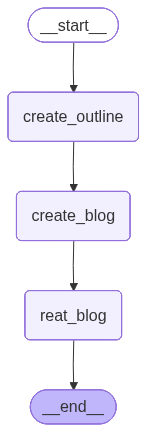

In [ ]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())